# Brain Tumor Segmentation Project

### Download Dataset

In [1]:
!wget https://figshare.com/ndownloader/articles/1512427/versions/5

--2024-03-29 16:29:16--  https://figshare.com/ndownloader/articles/1512427/versions/5
Resolving figshare.com (figshare.com)... 52.208.61.106, 54.216.85.172, 2a05:d018:1f4:d003:1dd8:2be0:3c3c:540d, ...
Connecting to figshare.com (figshare.com)|52.208.61.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘5’

5                   100%[===================>] 838.76M  27.9MB/s    in 31s     

2024-03-29 16:29:48 (26.7 MB/s) - ‘5’ saved [879501695/879501695]



### Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content

/content


### Clone Code from Github

In [3]:
!git clone https://github.com/HaseebKhan2805/segmentation.git

Cloning into 'segmentation'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (26/26), 1.35 MiB | 6.66 MiB/s, done.


### Change Directory to Segmentation Folder

In [4]:
%cd /content/segmentation

/content/segmentation


### Extract Images from Downloaded Dataset File

In [5]:
!python process_dataset.py

Creating unzipped_dataset folder
	Extracting files of ../5
	Done with ../5
Creating mat_files folder
  0% 0/4 [00:00<?, ?it/s]	Extracting files of unzipped_dataset/brainTumorDataPublic_767-1532.zip
	Done with unzipped_dataset/brainTumorDataPublic_767-1532.zip
 25% 1/4 [00:01<00:03,  1.13s/it]	Extracting files of unzipped_dataset/brainTumorDataPublic_2299-3064.zip
	Done with unzipped_dataset/brainTumorDataPublic_2299-3064.zip
 50% 2/4 [00:02<00:02,  1.08s/it]	Extracting files of unzipped_dataset/brainTumorDataPublic_1-766.zip
	Done with unzipped_dataset/brainTumorDataPublic_1-766.zip
 75% 3/4 [00:03<00:00,  1.00it/s]	Extracting files of unzipped_dataset/brainTumorDataPublic_1533-2298.zip
	Done with unzipped_dataset/brainTumorDataPublic_1533-2298.zip
100% 4/4 [00:04<00:00,  1.14s/it]
Creating images folder
Creating masks folder
100% 3064/3064 [01:44<00:00, 29.23it/s]
Total of 1860 Images and Masks are converted from .mat files


### Train Segmentation UNet Model

In [ ]:
!python main.py

Best weights and optimizer parameters are loaded
Device:  cuda
Training data:  911
Test data:  19
----Training started----
Epoch: 0, Training Loss: 0.188, Validation dice score: 0.8212, learning_rate: 0.00064
---Best val weights and optimizer parameters are saved---------
---Best training weights and optimizer parameters are saved----
Epoch: 1, Training Loss: 0.1901, Validation dice score: 0.8213, learning_rate: 0.00064
---Best val weights and optimizer parameters are saved---------
Epoch: 2, Training Loss: 0.1989, Validation dice score: 0.8245, learning_rate: 0.00064
---Best val weights and optimizer parameters are saved---------
Epoch: 3, Training Loss: 0.1887, Validation dice score: 0.7849, learning_rate: 0.0005120000000000001
Epoch: 4, Training Loss: 0.1897, Validation dice score: 0.8189, learning_rate: 0.0005120000000000001
Epoch: 5, Training Loss: 0.1843, Validation dice score: 0.7865, learning_rate: 0.0005120000000000001
---Best training weights and optimizer parameters are save

### Plot Training Results

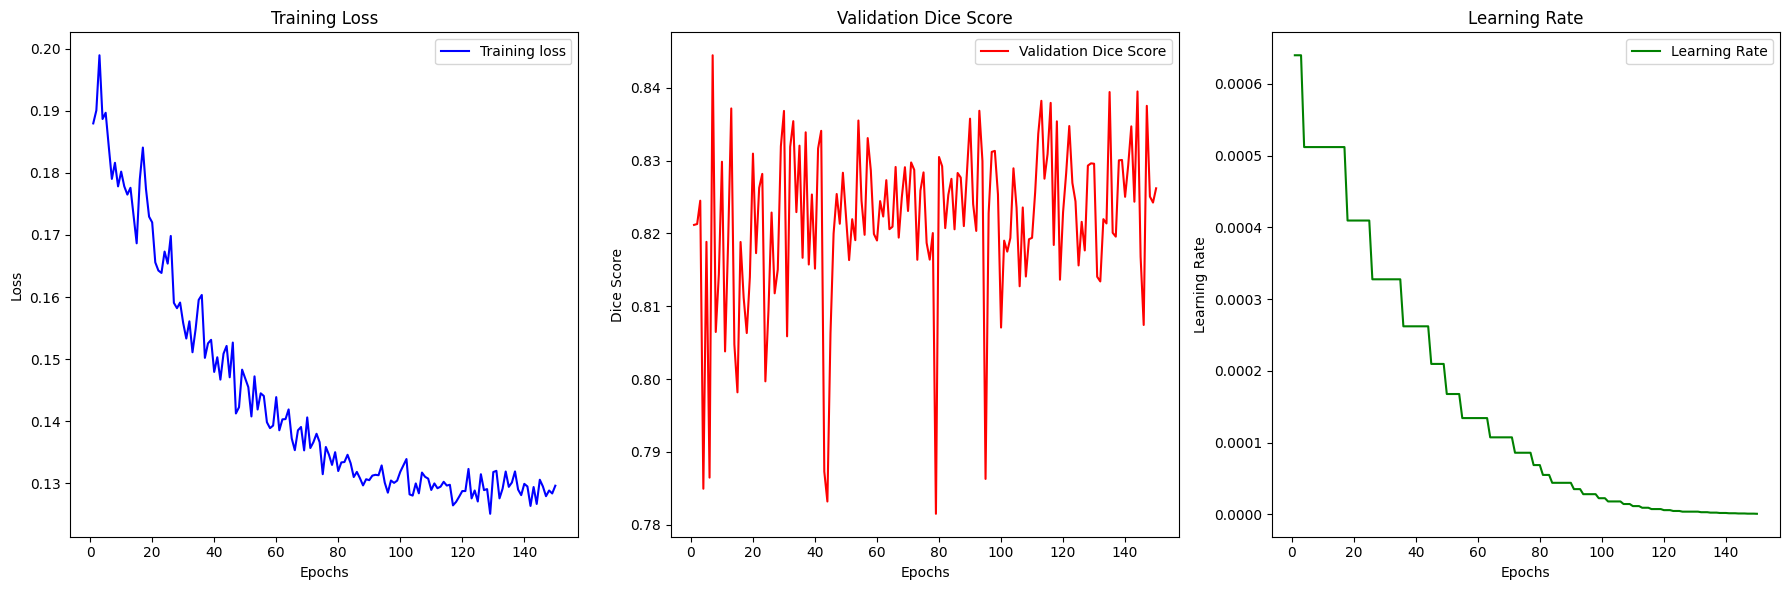

In [ ]:
from visualize_results import plot_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plot_loss()

### Do Inference on All of Your Images in a Folder

In [6]:
!python inference.py

### Feature Extraction Demo

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')



Perimeter: 108.3259
Area: 852.25 mm^2
Radius: 16.4706 mm
Diameter: 32.9411 mm
Circularity: 0.9127
Eccentricity: 0.2832
texture_features: 7.3214



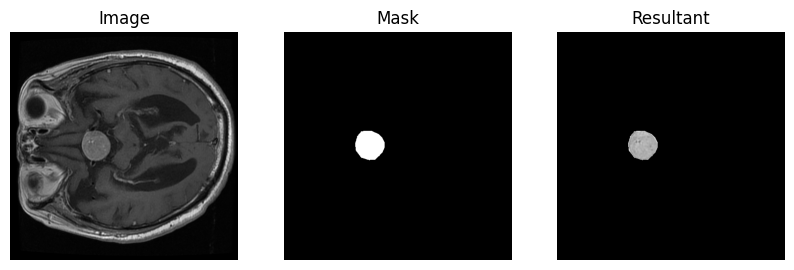

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from feature_extraction import extract_features
import warnings
warnings.filterwarnings('ignore')

image_path = "/content/segmentation/images/922.png"
mask_path = "/content/segmentation/masks/922.png"
mask = np.array(Image.open(mask_path).convert('L'))
image = np.array(Image.open(image_path).convert('L'))

# Perform point-to-point multiplication
result = mask * image

perimeter, area, radius, diameter, circularity, eccentricity, texture_features = extract_features(mask, result)

print()
print("Perimeter:", perimeter)
print("Area:", area,"mm^2")
print("Radius:", radius,"mm")
print("Diameter:", diameter,"mm")
print("Circularity:", circularity) #1 circular 0 non-circular
print("Eccentricity:", eccentricity) #0 circular 1 non-circular
print("texture_features:", texture_features)
print()
# Plot the original arrays and the result
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot mask
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Image')
axs[0].axis('off')

# Plot image
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask')
axs[1].axis('off')

# Plot the result
axs[2].imshow(result, cmap='gray')
axs[2].set_title('Resultant')
axs[2].axis('off')

plt.show()

### Extract Features From Images and Masks

In [ ]:
!python feature_extraction.py

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

## Train SVM and Random Forest Classifiers

### Load Dataset

In [ ]:
import pandas as pd
from config import config

features_dataset = pd.read_csv(config.result_folder_path.joinpath('features_dataset.csv'))
features_dataset.head()

,perimeter,area,radius,diameter,circularity,eccentricity,texture_features
0,70.8701,348.25,10.5286,21.0572,0.8713,0.6430,4.6125
1,42.5563,120.00,6.1804,12.3608,0.8326,0.7236,3.8557
2,88.4767,545.00,13.1711,26.3423,0.8749,0.5947,5.6426
3,91.1335,580.00,13.5875,27.1750,0.8776,0.4365,5.9275
4,87.5269,508.75,12.7256,25.4511,0.8345,0.5196,6.4027


### Analyze Diameter

<Axes: ylabel='Frequency'>

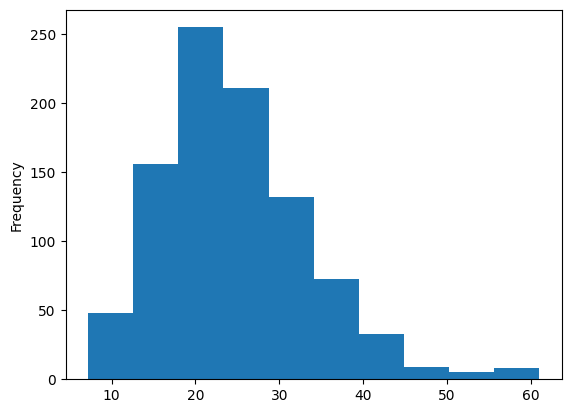

In [ ]:
features_dataset['diameter'].plot(kind='hist')

### Add Class column in the Dataset by Applying Condition on Diameter column

1    868
2     54
0      8
Name: class, dtype: int64


<Axes: ylabel='Frequency'>

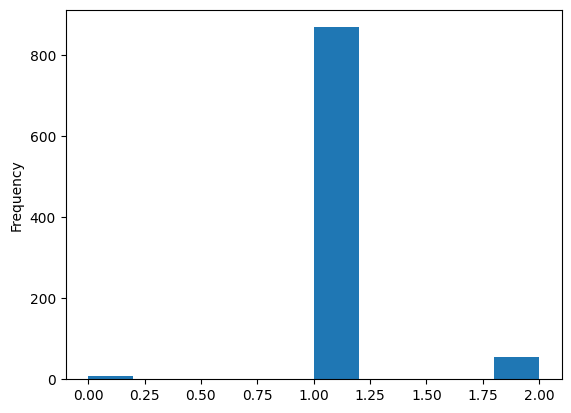

In [ ]:
features_dataset['class'] = features_dataset['diameter'].apply(lambda x: 0 if x <= 10 else (1 if x < 40 else 2))
print(features_dataset['class'].value_counts())
features_dataset['class'].plot(kind='hist')

### Drop 500 Random Rows where class is 1

<Axes: ylabel='Frequency'>

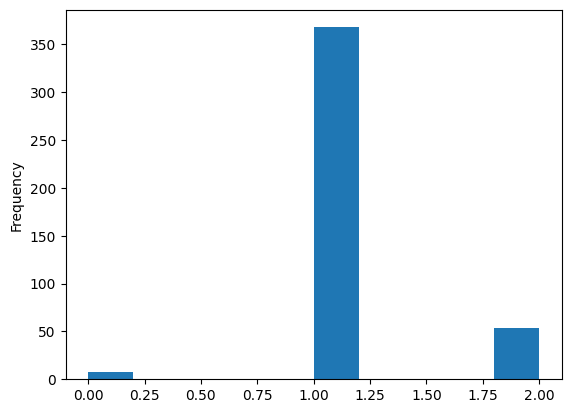

In [ ]:
import pandas as pd
import numpy as np

df = features_dataset
class_1_indices = df.index[df['class'] == 1]
random_indices = np.random.choice(class_1_indices, 500, replace=False)
df = df.drop(random_indices)
df['class'].plot(kind='hist')

In [ ]:
df.head()

,perimeter,area,radius,diameter,circularity,eccentricity,texture_features,class
0,70.8701,348.25,10.5286,21.0572,0.8713,0.6430,4.6125,1
1,42.5563,120.00,6.1804,12.3608,0.8326,0.7236,3.8557,1
4,87.5269,508.75,12.7256,25.4511,0.8345,0.5196,6.4027,1
5,117.4680,885.00,16.7840,33.5681,0.8060,0.4600,9.0635,1
6,80.2843,310.50,9.9416,19.8832,0.6054,0.8794,4.5824,1


### Balance the Dataset by Random Sampling with Replacement

In [ ]:
import pandas as pd
from sklearn.utils import resample
from config import config

class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]
class_2 = df[df['class'] == 2]

max_samples = max(len(class_0), len(class_1), len(class_2))

class_0_upsampled = resample(class_0, replace=True, n_samples=max_samples // 2, random_state=42)
class_1_upsampled = resample(class_1, replace=True, n_samples=max_samples, random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=max_samples // 2, random_state=42)

balanced_df = pd.concat([class_0_upsampled, class_1_upsampled, class_2_upsampled])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df.to_csv(config.result_folder_path.joinpath('balanced_df.csv'), index=False)
balanced_df.head()


,perimeter,area,radius,diameter,circularity,eccentricity,texture_features,class
0,211.9949,2405.00,27.6683,55.3366,0.6725,0.7914,11.3992,2
1,31.3137,68.50,4.6695,9.3390,0.8779,0.6568,8.4987,0
2,99.7371,614.75,13.9886,27.9772,0.7766,0.7312,8.6849,1
3,105.0122,784.75,15.8049,31.6097,0.8943,0.4367,7.4594,1
4,86.3345,524.50,12.9211,25.8421,0.8843,0.2361,6.8459,1


### Compare Values Before and After Resampling

In [ ]:
print(features_dataset['class'].value_counts())
print(balanced_df['class'].value_counts())

1    868
2     54
0      8
Name: class, dtype: int64
1    368
2    184
0    184
Name: class, dtype: int64


### Analyze Diameter After Resampling

<Axes: ylabel='Frequency'>

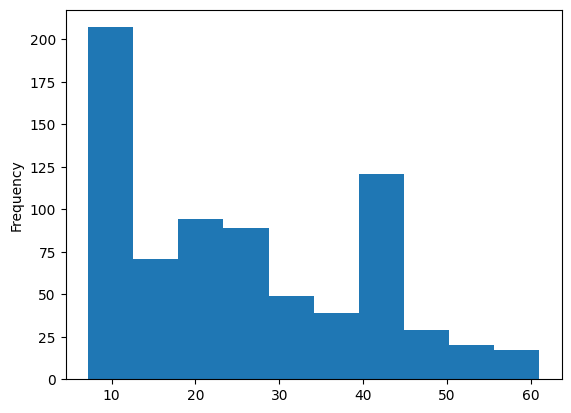

In [ ]:
balanced_df['diameter'].plot(kind='hist')

# **RUN CELLS BELWO ONLY**



### Split Dataset into Train(scaled) and Test sets

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from config import config

balanced_df = pd.read_csv(config.result_folder_path.joinpath('balanced_df.csv'))

scaler = StandardScaler()
X = balanced_df.iloc[:,:-1]
y = balanced_df.iloc[:,-1:]
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        40

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



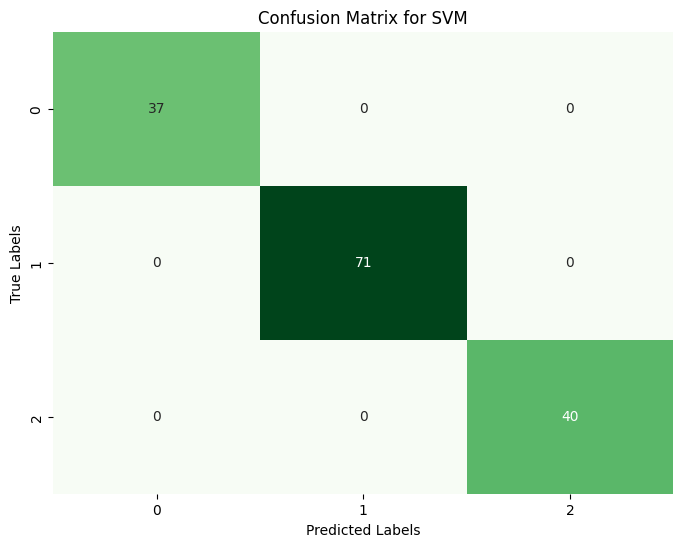

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        40

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



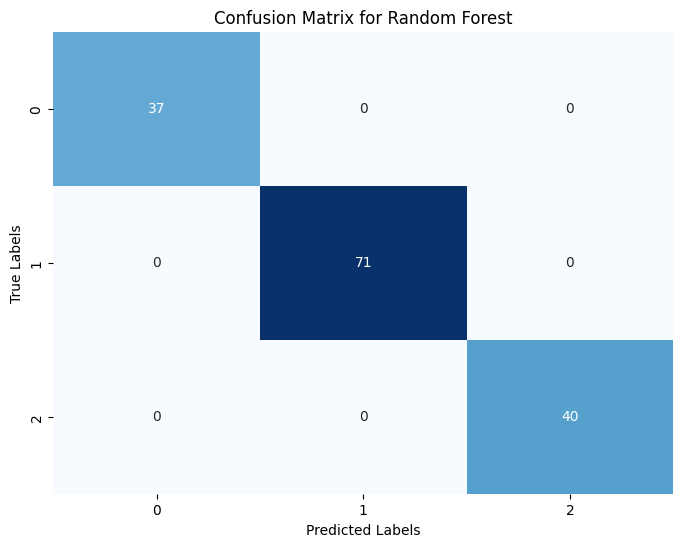

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        40

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



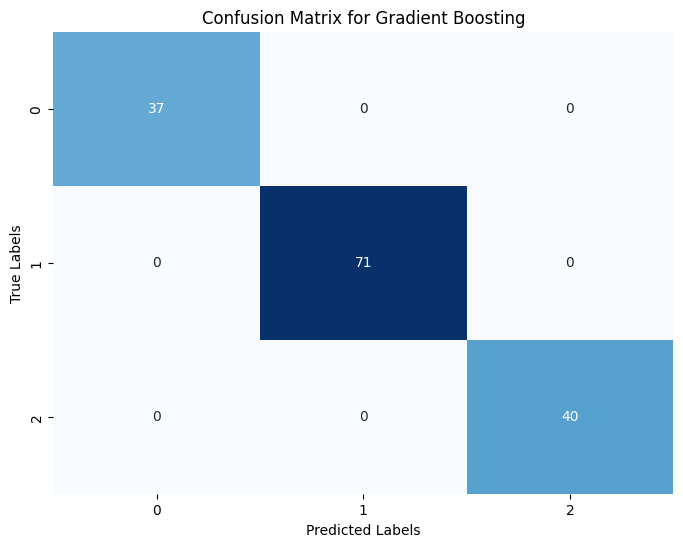

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



### K-Nearest Neighbors

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

print("K-Nearest Neighbors (KNN) Performance:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.99      0.99        71
           2       0.98      1.00      0.99        40

    accuracy                           0.99       148
   macro avg       0.99      1.00      0.99       148
weighted avg       0.99      0.99      0.99       148



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


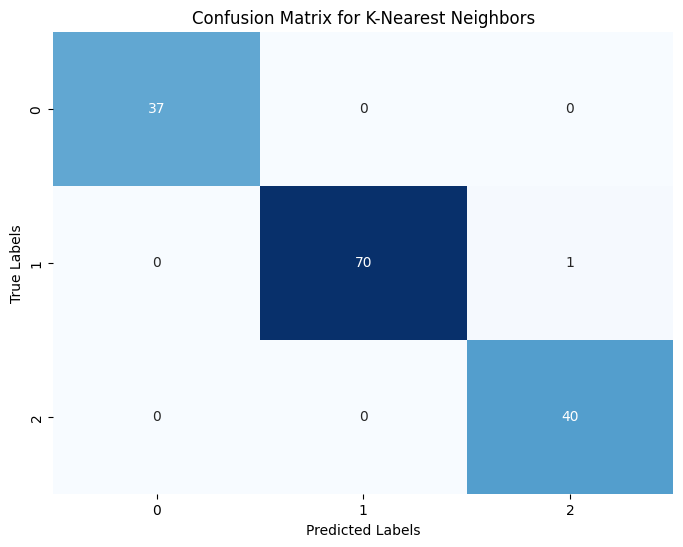

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Naive Bayes

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.93      0.96        71
           2       0.91      1.00      0.95        40

    accuracy                           0.97       148
   macro avg       0.96      0.98      0.97       148
weighted avg       0.97      0.97      0.97       148



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


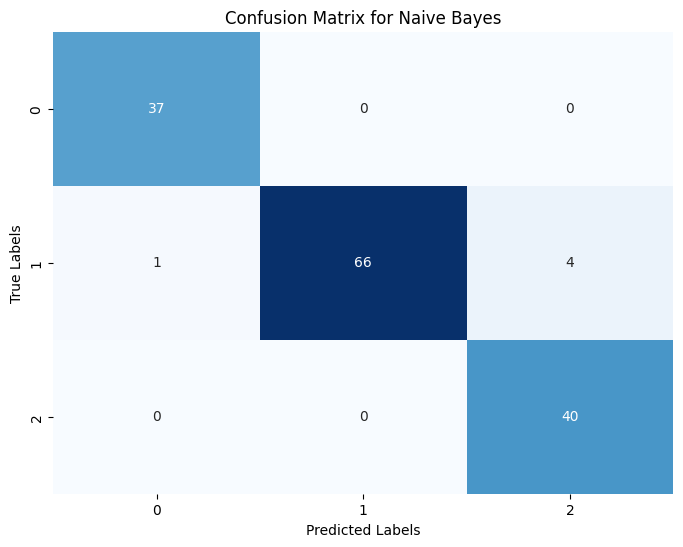

In [ ]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Save Models

In [ ]:
import joblib

joblib.dump(svm_classifier, config.result_folder_path.joinpath('svm_model.pkl'))
joblib.dump(rf_classifier, config.result_folder_path.joinpath('random_forest_model.pkl'))
joblib.dump(gb_classifier, config.result_folder_path.joinpath("gb_classifier.pkl"))
joblib.dump(knn_classifier, config.result_folder_path.joinpath("knn_classifier.pkl"))
joblib.dump(nb_classifier, config.result_folder_path.joinpath("nb_classifier.pkl"))

joblib.dump(scaler, config.result_folder_path.joinpath('scaler.pkl'))

['/content/drive/MyDrive/segmentation_project/results/scaler.pkl']

# Full Pipeline Segmentation + Classifier

### Load Models

In [8]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import joblib
from sklearn.preprocessing import StandardScaler
from unet_model import UNet
from feature_extraction import extract_features
from pathlib import Path
from config import config
import os

transformation = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((config.image_size, config.image_size))
    ])
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNet()
model.to(device)
checkpoint_path = config.training_weights_path.joinpath("best_128.pth")
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
else:
    print("No Weights are Found")

scaler_loaded = joblib.load(config.result_folder_path.joinpath('scaler.pkl'))
svm_loaded = joblib.load(config.result_folder_path.joinpath('svm_model.pkl'))
random_forest_loaded = joblib.load(config.result_folder_path.joinpath('random_forest_model.pkl'))
gb_classifier_loaded = joblib.load(config.result_folder_path.joinpath("gb_classifier.pkl"))
knn_classifier_loaded = joblib.load(config.result_folder_path.joinpath("knn_classifier.pkl"))
nb_classifier_loaded = joblib.load(config.result_folder_path.joinpath("nb_classifier.pkl"))
classes = ['micro_adenoma', 'macro_adenoma', 'giant_adenoma'] # 0, 1, 2

### Do Inference

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')



Extracted Features of Pituitary Tumor
Perimeter: 223.6016
Area: 2926.5 mm^2
Radius: 30.521 mm
Diameter: 61.0421 mm
Circularity: 0.7355
Eccentricity: 0.8356
texture_features: 6.499


Classifiers Pridictions
svm: giant_adenoma
random forest: giant_adenoma
gradient boot: giant_adenoma
nearest neighbor:  giant_adenoma
naive bayes: giant_adenoma



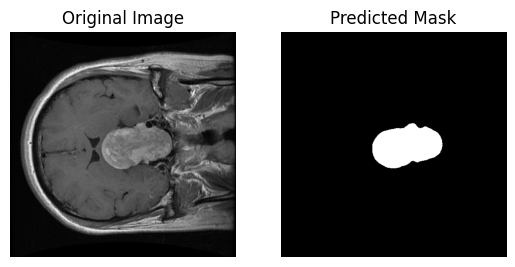

In [12]:
model.eval()
'''
micro_adenoma 0 = 1557, 1413
macro_adenoma 1 = 922
giant_adenoma 2 = 1541
'''

path = "/content/segmentation/images/1541.png"
with torch.no_grad():
    image = Image.open(path)
    image1 = transformation(image)
    image1 = TF.to_tensor(image1)
    image1 = image1.unsqueeze(dim=0)
    image1 = image1.to(device)
    model.to(device)
    pred_mask = model(image1)
    pred_mask = (pred_mask > 0.5)

    pred_mask = pred_mask.squeeze().detach().cpu()
    pred_mask = pred_mask.numpy()
    mask1 = Image.fromarray(pred_mask)

    mask1 = np.array(mask1)
    image = np.array(image.convert('L'))
    mul = mask1 * image
    perimeter, area,	radius,	diameter,	circularity,	eccentricity,	texture_features = extract_features(mask1, mul)

    print()
    print("Extracted Features of Pituitary Tumor")
    print("Perimeter:", perimeter)
    print("Area:", area, "mm^2")
    print("Radius:", radius,"mm")
    print("Diameter:", diameter,"mm")
    print("Circularity:", circularity) #1 circular 0 non-circular
    print("Eccentricity:", eccentricity) #0 circular 1 non-circular
    print("texture_features:", texture_features)
    print()

    data = scaler_loaded.transform([[perimeter,	area,	radius,	diameter,	circularity,	eccentricity,	texture_features]])
    svm_pred = svm_loaded.predict(data)
    random_forest_pred = random_forest_loaded.predict(data)
    gb_classifier_pred = gb_classifier_loaded.predict(data)
    knn_classifier_pred = knn_classifier_loaded.predict(data)
    nb_classifier_pred = nb_classifier_loaded.predict(data)

    print()
    print("Classifiers Pridictions")
    print("svm:", classes[svm_pred[0]])
    print("random forest:", classes[random_forest_pred[0]])
    print("gradient boot:", classes[gb_classifier_pred[0]])
    print("nearest neighbor: ", classes[knn_classifier_pred[0]])
    print("naive bayes:", classes[nb_classifier_pred[0]])
    print()

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask1, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.savefig(config.result_folder_path.joinpath('inference.png'))
    plt.show()

### End